
Modelagem, Simulação e Implementação de Sistemas
========

**Lista III** - Espaço de Estados
-------

Guilherme Brandão da Silva

***

In [168]:
% Carrega módulos para operações simbólicas e operações em frequência
pkg load control
pkg load symbolic
pkg load signal

### **Exemplo 1:** Converta para Espaço de Estados: $$ \frac{Y(s)}{U(s)} = \frac{s}{s^3 + 14s^2+ 56s + 160}$$

In [169]:
% Montando a Função de Transferência
num = [1];
den = [1 14 56 160];

% Obtém a Representação em Espaço de Estados
[A, B, C, D] = tf2ss(num, den)

% Obtém Novamente a Função de Transferência
[num, den] = ss2tf(A, B, C, D)

A =

    0.00000    0.00000   -1.60000
  -10.00000    0.00000    5.60000
    0.00000  -10.00000  -14.00000

B =

  -0.010000
   0.000000
   0.000000

C =

   0   0  -1

D = 0
num =  1
den =

     1.0000    14.0000    56.0000   160.0000



### **Exemplo 2:** Converta para Função de Transferência: 
$$\begin{pmatrix} \dot{x1}\\ \dot{x2} \\ \dot{x3}\end{pmatrix}=\begin{pmatrix} 0&1&0\\0&0&1\\-5&-25&-5\end{pmatrix}\begin{pmatrix} x1\\ x2 \\ x3\end{pmatrix}+\begin{pmatrix} 0\\25\\-120\end{pmatrix}u$$

$$y =\begin{pmatrix}1&0&0\end{pmatrix}\begin{pmatrix}x1\\ x2 \\ x3\end{pmatrix}$$

In [170]:
% Definindo as Matrizes de Estado
A = [0 1 0; 0 0 1;-5 -25 -5];
B = [0 25 -20]';
C = [1 0 0];
D = 0;

% Obtém a Função de Transferência
[num, den] = ss2tf(A, B, C, D)

num =

    25.000   105.000

den =

    1.0000    5.0000   25.0000    5.0000



### **Exemplo 3:** Converta para Função de Transferência:
$$\begin{pmatrix}\dot{x1}\\ \dot{x2} \\ \dot{x3}\end{pmatrix}=\begin{pmatrix}-1&1&0\\0&-1&1\\0&0&-2\end{pmatrix}\begin{pmatrix}x1\\ x2 \\ x3\end{pmatrix}+\begin{pmatrix}0\\0\\1\end{pmatrix}u$$

$$y =\begin{pmatrix}1&0&0\end{pmatrix}\begin{pmatrix} x1\\ x2 \\ x3\end{pmatrix}$$

In [172]:
% Definindo as Matrizes de Estado
A = [-1 1 0; 0 -1 1;0 0 -2];
B = [0 0 1]';
C = [1 0 0];
D = 0;

% Obtém a Função de Transferência
[num, den] = ss2tf(A, B, C, D)

num =  1.0000
den =

   1.0000   4.0000   5.0000   2.0000



### **Exercício 1:** Determine a Função de Transferência de ambos circuitos: $$G(s) = \frac{V_o(s)}{V_i(s)}$$ ![](e1.png)

#### Circuito (a):
1. Fazendo a Equação de Nós no Domínio de Laplace:
$$(V_x - V_i) + V_x + \frac{V_x}{s} = 0$$
2. Arranjando a Equação sabendo que $V_x$ = $V_o$:
$$ \frac{V_o(2s + 1)}{s} = V_i$$ 
assim, segue que:
$$ \Rightarrow \frac{V_o}{V_i} = \frac{s}{2s + 1}$$


Transfer function 'Gs' from input 'u1' to output ...

         1   
 y1:  -------
      2 s + 1

Continuous-time model.


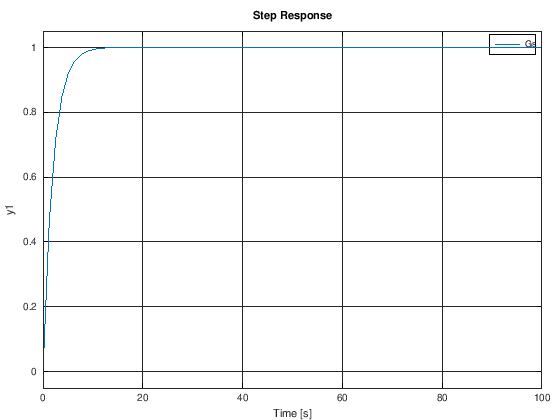

In [173]:
# Função de Transferência do Circuito (a)
Gs = tf([1], [2 1])

# Resposta ao Degrau
step(Gs, 100)

#### Circuito (b):
1. Fazendo a Equação de Malha no Domínio de Laplace:
$$-V_i + 1I + \frac{I}{s} + Is = 0$$
2. Arranjando a Equação sabendo que $Is = V_o$:
$$\frac{V_o}{V_i} = \frac{s^2}{\left(1 + s + s^2\right)}$$


Transfer function 'Gs' from input 'u1' to output ...

          s^2    
 y1:  -----------
      s^2 + s + 1

Continuous-time model.


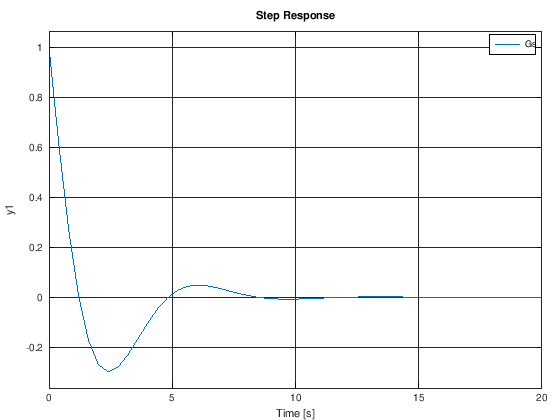

In [174]:
# Função de Transferência do Circuito (bS)
Gs = tf([1 0 0], [1 1 1])

# Resposta ao Degrau
step(Gs, 20)

### **Exercício 2:** Determine a Função de Transferência do Diagrama de Blocos: $$T(s) = \frac{Y(s)}{R(s)}$$ ![](e2.png)

1. Se A é o sinal de intersecção e B o sinal da saida do somador, temos:
$$Y = Ag_2$$
$$A = (R - B)g_1$$
$$B = Y - Ag_3$$
2. Resolvendo este sistema, temos:
$$ \frac{Y}{R} = \frac{10}{s^2 + 21s + 10}$$

T = (sym)

        10      
  ──────────────
   2            
  s  + 21⋅s + 10



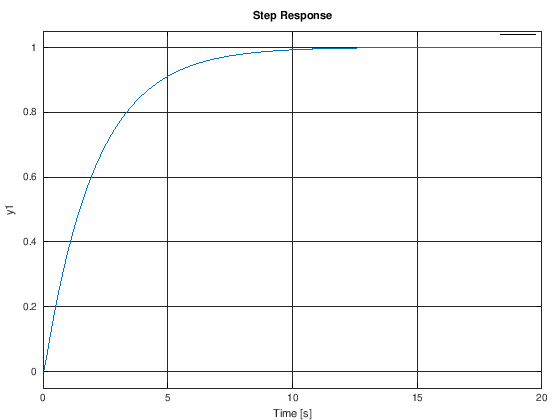

In [175]:
syms g1 g2 g3 Y R s

% Resolvendo Simbolicamente as Equações
g1 = (10)/(s+1);
g2 = (1/s);
g3 = 2;

% Simplificando a Função de Transferência
T = (g1*g2)/(g1*(g2+g3)+ 1);
T = simplify(T)

% Resposta ao Degrau
step(tf([10], [1 21 10]))

### **Exercício 3a:** Determine G(s) e H(s) para o Diagrama (b) ser equivalente ao (a) : $$T(s) = \frac{Y(s)}{R(s)}$$ ![](e3a.png) ![](e3b.png)
### Então, obtenha a Função de Transferência.

1. Se $x_2$ é o sinal (-) do primeiro somador e $x_1$ o sinal (+) do segundo somador, temos:
$$x_1 = (R - x_2)g_1$$
$$x_2 = (x_1 - Y)$$
$$Y = x_2 g_2 $$
2. Resolvendo o sistema, temos:
$$\frac{Y}{R} = \frac{g_1g_2}{(1+g_1 - g_1g_2)}$$
3. Rearranjando para o formato padrão da realimentação, segue que:
    $$ \frac{Y}{R} = \frac{(g_2/g_2)}{1 + g_1(1-g_2)}$$
4. Portanto:
$$G = g_1g_2$$
$$H = \frac{1-g_2}{g_2}$$

Symbolic pkg v2.7.0: Python communication link active, SymPy v1.2.
G = (sym)

         1        
  ────────────────
  (s + 5)⋅(s + 10)

H = (sym)

  ⎛      1   ⎞         
  ⎜1 - ──────⎟⋅(s + 10)
  ⎝    s + 10⎠         

T = (sym)

        1       
  ──────────────
   2            
  s  + 16⋅s + 59



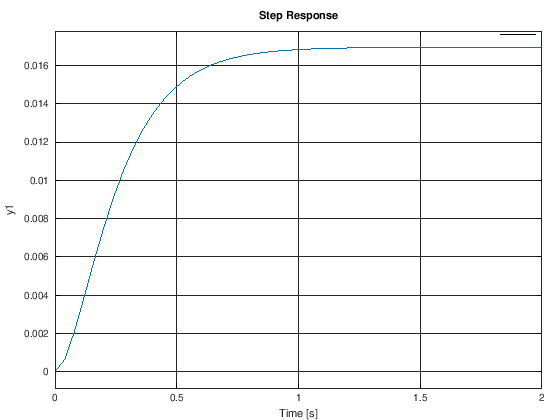

In [176]:
clear all
syms x1 x2 Y R g1 g2 s

% Resolvendo Simbolicamente as Equações
g1 = 1/(s+5);
g2 = 1/(s+10);

% Obtendo G e H
G = g1*g2
H = (1-g2)/g2

T = simplify(G/(1+G*H))
% Resposta ao Degrau
step(tf([1], [1 16 59]), 2)

### **Exercício 4:** Determine a Função de Transferência de Malha Fechada: ![](e4.png)

1. A Função de Malha Fechada é dada por: $$\frac{Y}{R} = \frac{CP}{CP + 1}$$


Transfer function 'T' from input 'u1' to output ...

          s + 2    
 y1:  -------------
      s^2 + 5 s + 5

Continuous-time model.


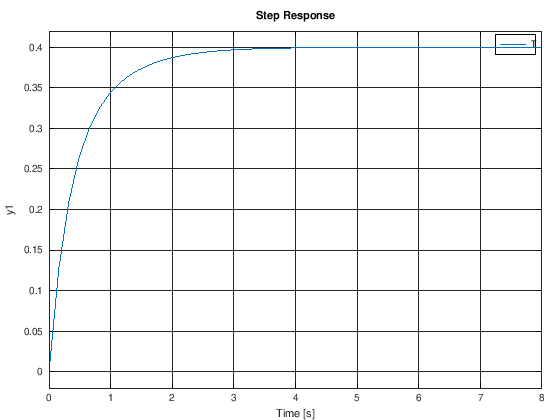

In [177]:
% Montando as Equações
C = tf([1], [1 1]);
P = tf([1 2], [1 3]);
G = series(C,P);

% Realizando a Realimentação
T = feedback(G, 1)

% Resposta ao Degrau
step(T, 8)

### **Exercício 5:** Determine a Função de Transferência de Malha Fechada: ![](e5.png)

In [178]:
% Declaração dos Blocos
g1 = tf(4, 1);
g2 = tf(1, [1 1]);
g3 = tf(1, [1 0 1]);
g4 = tf(1, [1 0 0]);
g5 = tf([4 2], [1 2 1]);
g6 = tf(50, 1);
g7 = tf([1 0 2], [1 0 0 14]);

% Simplifições Intermediárias
h1 = series(g2, g3);
h2 = feedback(h1, g5, +1);
h3 = feedback(g4, g6);
h4 = feedback(series(h2, h3), 1);

% Simplificação Final
T = series(g1, h4)


Transfer function 'T' from input 'u1' to output ...

                             4 s^2 + 8 s + 4                        
 y1:  --------------------------------------------------------------
      s^7 + 3 s^6 + 54 s^5 + 154 s^4 + 199 s^3 + 200 s^2 - 48 s - 49

Continuous-time model.


### **Exercício 6:** Determine a Função de Transferência de Malha Fechada: ![](e6.png)

In [212]:
% Realizando as simplificações dos Blocos:
syms g1 g2 g3 h1 h2 h3 

x0 = h2*g2;
x1 = h1+g2;
x2 = x1*g3;
x3 = x2/x0;
x4 = x3/(1+x3*h3);
x5 = x4/(1+x4*x3);
x6 = x5*g1;
x7 = x6/(1+x6);

% Simplificando a Função de Transferência:
x7 = simplify(x7)

x7 = (sym)

                           g₁⋅g₂⋅g₃⋅h₂⋅(g₂ + h₁)                          
  ────────────────────────────────────────────────────────────────────────
                                                              2          2
  g₁⋅g₂⋅g₃⋅h₂⋅(g₂ + h₁) + g₂⋅h₂⋅(g₂⋅h₂ + g₃⋅h₃⋅(g₂ + h₁)) + g₃ ⋅(g₂ + h₁) 



# **Exercício 7:** Represente em Espaço de Estados o Circuito: ![](e7.png)

1. Os estados são os elementos armazenadores de energia, portanto:
$$x = \begin{pmatrix} 
V_{C1} \\ I_L \\ V_C2
\end{pmatrix}$$

2. O vetor deriviada dos estados:
$$\dot{x} = \begin{pmatrix} 
\dot{V_{C1}} \\ \dot{I_L} \\ \dot{V_C2}
\end{pmatrix}$$

3. Extraindo as Equações de Malha, temos:
$$-v_i + i_1 + i_3 + i_5 + v_o = 0$$
$$ \Rightarrow -v_i + 3i_1 - 2i_2 - i_4 + v_o = 0 $$
$$ \Rightarrow -v_i + 3i_1 - 2i_2 - i_4 + v_o = 0 $$

assim, segue que:
$$i_2 = -0,5i_4 + 0,5v_o + v_i - 1,5v_1$$
como $i_5 = v_2 - v_c$,
$$ i_5 = 0,5v_1 - 0,5v_o -0,5i_4 $$

Como a tensão sobre o indutor é, $v_2 = v_o - i_5$:

$$v_2 = 1,5v_o - 0,5v_1 + 0,5i_4$$

4. Com essas variáveis podemos montar a Equação de Estado
$$\dot{x}=
\begin{pmatrix} 
-1,5 & -0,5 & 0,5 \\ -0,5 & 0,5 & 1,5 \\ 0,5 & -0,5 & -0,5
\end{pmatrix}x + \begin{pmatrix} 
1 \\ 0 \\ 0
\end{pmatrix}$$

5. Obtendo também a saída do sistema, a tensão $v_o$:
$$v_o = \begin{pmatrix} 
0 & 0 & 1
\end{pmatrix}x$$

In [203]:
% Equação em Espaço de Estados
A = [-1.5 -0.5 0.5; -0.5 0.5 1.5; 0.5 -0.5 -0.5];
B = [1;0;0];
C = [0 0 1];
D = 0;
ss(A,B,C,D) 

% Função de Transferência
[den, num] = ss2tf(A, B, C, D);
T = tf(den, num)


ans.a =
         x1    x2    x3
   x1  -1.5  -0.5   0.5
   x2  -0.5   0.5   1.5
   x3   0.5  -0.5  -0.5

ans.b =
       u1
   x1   1
   x2   0
   x3   0

ans.c =
       x1  x2  x3
   y1   0   0   1

ans.d =
       u1
   y1   0

Continuous-time model.

Transfer function 'T' from input 'u1' to output ...

             0.5 s - 1.11e-16       
 y1:  ------------------------------
      s^3 + 1.5 s^2 - 1.11e-16 s + 1

Continuous-time model.


### **Exercício 8:** Represente em Espaço de Estados as Funções de Transferência:
### $$G_1(s) = \frac{1}{s + 10}$$
### $$G_2(s) = \frac{3s^2 + 10s + 1}{s^2 + 8s + 5}$$
### $$G_3(s) = \frac{s + 14}{s^3 + 3s^2 + 3s + 1}$$

In [179]:
% Obtendo as Matrizes de Estado para G1
g1 = tf(1, [1 10]);
[A1, B1, C1, D1] = tf2ss(g1)

% Obtendo as Matrizes de Estado para G2
g2 = tf([3, 10 1], [1 8 5]);
[A2, B2, C2, D2] = tf2ss(g2)

% Obtendo as Matrizes de Estado para G3
g3 = tf([1 14], [1 3 3 1]);
[A3, B3, C3, D3] = tf2ss(g3)

A1 = -10
B1 =  1
C1 =  1
D1 = 0
A2 =

  -1.1102e-16   5.0000e+00
  -1.0000e+00  -8.0000e+00

B2 =

   1.4000
  -1.4000

C2 =

    0   10

D2 =  3
A3 =

   -0.00000   -0.00000    0.10000
    1.00000    0.00000    0.30000
    0.00000  -10.00000   -3.00000

B3 =

   1.40000
   0.10000
   0.00000

C3 =

   0   0  -1

D3 = 0


### **Exercício 9:** Represente as Funções de Transferência em Espaço de Estados: 
$$A = \begin{pmatrix} 0 & 1\\ 2 & 4 \end{pmatrix}, B = \begin{pmatrix} 1 \\ 1 \end{pmatrix}, C = \begin{pmatrix} 1 & 0 \end{pmatrix}$$

$$A = \begin{pmatrix} 1 & 1 & 0\\ -2 & 0 & 4 \\ 6 & 2 & 10 \end{pmatrix}, B = \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}, C = \begin{pmatrix} 0 & 1 & 0 \end{pmatrix}$$

$$A = \begin{pmatrix} 0 & 1\\ -1 & -2 \end{pmatrix}, B = \begin{pmatrix} 0 \\ 1 \end{pmatrix}, C = \begin{pmatrix} 1 & 1 \end{pmatrix}$$




In [158]:
% Definindo as Matrizes de Estado
A = [0 1; 2 4];
B = [1 1]';
C = [1 0];
D = 0;

% Obtém a Função de Transferência
[num, den] = ss2tf(A, B, C, D);
T = tf(num, den)

% Definindo as Matrizes de Estado
A = [1 1 0; -2 0 4;6 2 10];
B = [0 0 1]';
C = [0 1 0];
D = 0;

% Obtém a Função de Transferência
[num, den] = ss2tf(A, B, C, D);
T = tf(num, den)

% Definindo as Matrizes de Estado
A = [0 1; 2 4];
B = [0 1]';
C = [1 0];
D = 0;

% Obtém a Função de Transferência
[num, den] = ss2tf(A, B, C, D);
T = tf(num, den)


Transfer function 'T' from input 'u1' to output ...

         1 s - 3   
 y1:  -------------
      s^2 - 4 s - 2

Continuous-time model.

Transfer function 'T' from input 'u1' to output ...

              4 s - 4        
 y1:  -----------------------
      s^3 - 11 s^2 + 4 s - 36

Continuous-time model.

Transfer function 'T' from input 'u1' to output ...

            1      
 y1:  -------------
      s^2 - 4 s - 2

Continuous-time model.


### **Exercício 10:** Dada a Função de Trasferênica: $$ \frac{V_o}{V_i} = \frac{1}{R_1R_2C_1C_2s^2+ (R_1C_1 + R_2C_2 + R_1C_2)s + 1}$$ 

### Mostre que sua representação em Espaço de Estados é dado por $$\dot{x} = 
\begin{pmatrix} 
-3,2 & -2\\ 1 & 0
\end{pmatrix}x + \begin{pmatrix} 
1 \\ 0
\end{pmatrix}
V_i$$
### considerando $R_1 = 1$, $R_2 = 10$, $C_1 = 0.5$ e $C_2 = 0,1$.


In [162]:
r1 = 1;
r2 = 10;
c1 = 0.5;
c2 = 0.1;

Vo = tf(1, [r1*r2*c1*c2 (r1*c1 + r2*c2 + r1*c2) 1])

% Obtendo as Matrizes de Estado
[A, B, C, D] = tf2ss(Vo)


Transfer function 'Vo' from input 'u1' to output ...

               1         
 y1:  -------------------
      0.5 s^2 + 1.6 s + 1

Continuous-time model.
A =

   0.00000  -2.00000
   1.00000  -3.20000

B =

  -1
   0

C =

   0  -2

D = 0


### **Exercício 11:** Determine a representação em Espaço de Estados do Diagrama: ![](e11.png)

In [167]:
# Obtendo a Função de Transferência
C = tf(1, [1 2]);
P = tf(1, [1 2 4]);
G = series(C, P);

T = feedback(G)

% Obtendo as Matrizes de Estado
[A, B, C, D] = tf2ss(T)


Transfer function 'T' from input 'u1' to output ...

                1          
 y1:  ---------------------
      s^3 + 4 s^2 + 8 s + 9

Continuous-time model.
A =

    0.00000    0.00000   -0.90000
   -1.00000    0.00000    0.80000
    0.00000  -10.00000   -4.00000

B =

  -1
   0
   0

C =

   0.00000   0.00000  -0.10000

D = 0


### **Exercício 12:** Determine a representação em Espaço de Estados do Diagrama: ![](e12.png)

In [213]:
% Obtendo a Função de Malha Fechada
syms z p s

g1 = (s + z)/(s + p);
g2 = 1/s^2;
G = g1*g2;

Y = simplify(G/(1 + G));
[den, num] = numden(Y)

den = (sym) s + z
num = (sym)

   2                
  s ⋅(p + s) + s + z

